# Prediction using Supervised ML

In [36]:
#importing all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Reading the dataset
dataset = pd.read_csv("http://bit.ly/w-data")

In [38]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


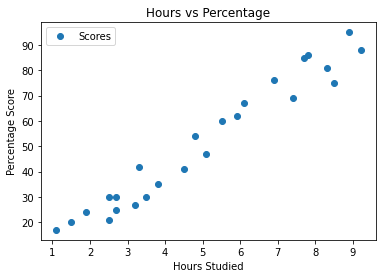

In [40]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph, we can see that there is a linear relationship between the no of hours studided to percentage scored.

In [41]:
#Preparing the data

attributes =dataset.iloc[:,:-1].values
labels = dataset.iloc[:,1].values

Now that we have the attributes and labels next step is to split the dataset into training and test sets. For that we will use **Scikit-Learn's built-in train_test_split() method:

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(attributes, labels, 
                            test_size=0.2, random_state=0) 

**Training the algorithm

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [45]:
print(regressor.intercept_, regressor.coef_)


2.018160041434683 [9.91065648]


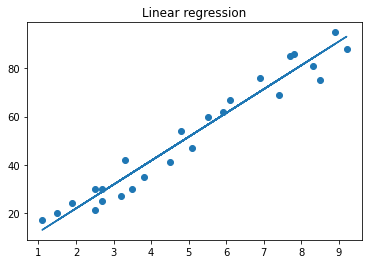

In [46]:
# Plotting the regression line
line = regressor.coef_* attributes +regressor.intercept_

# Plotting for the test data
plt.scatter(attributes, labels)
plt.plot(attributes, line);
plt.title('Linear regression')
plt.show()

Making predictions

In [47]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
